In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
df = pd.read_csv("cars.csv")

In [27]:
print("Shape", df.shape)
print("Size  ", df.size)

Shape (5044, 23)
Size   116012


### Checking dublicates

In [26]:
dumps = df.duplicated()
print('Number of dublicates rows:%d' %dumps.sum())

Number of dublicates rows:0


### Cheking Dataset Head

In [9]:
df.head()

,Unnamed: 0,Unit,vin,price,miles,year,Unnamed: 6,model,vehicle_type,body_type,...,color,zip,state,city,seller_type,is_certified,dom,dom_180,msrp,seller_name
0,1,1,19UDE2F3XGA002005,16997.0,25499.0,2016,NaN,ILX,Car,Sedan,...,NaN,28273,NC,Charlotte,dealer,NaN,60.0,60.0,16997.0,hendrick honda
1,2,1,19UUB1F35FA009543,21491.0,33352.0,2015,NaN,TLX,Car,Sedan,...,Graphite Luster Metallic,28227,NC,Charlotte,dealer,NaN,90.0,3.0,21491.0,hendrick bmw
2,3,1,19UUB2F75FA000172,24499.0,22888.0,2015,NaN,TLX,Van,Sedan,...,Graphite Luster Metallic,28269,NC,Charlotte,dealer,1.0,83.0,82.0,24499.0,audi northlake
3,4,1,1C4BJWDG7HL502000,33635.0,17956.0,2017,NaN,Wrangler,SUV,SUV,...,Firecracker Red,28227,NC,Charlotte,dealer,NaN,154.0,27.0,33635.0,hendrick acura
4,5,1,1C4NJPCB5ED547385,13878.0,71061.0,2014,NaN,Patriot,SUV,SUV,...,True Blue Pearlcoat,28273-6935,NC,Charlotte,dealer,NaN,110.0,49.0,13878.0,hendrickcars.com charlotte


### Renaming Columns

In [10]:
df.rename(columns={'Unnamed: 6': 'Company'},inplace=True)
print(df.columns)

Index(['Unnamed: 0', 'Unit', 'vin', 'price', 'miles', 'year', 'Company',
       'model', 'vehicle_type', 'body_type', 'fuel_type', 'engine',
       'transmission', 'color', 'zip', 'state', 'city', 'seller_type',
       'is_certified', 'dom', 'dom_180', 'msrp', 'seller_name'],
      dtype='object')


### Checking Missing values and Data types

In [11]:
def null_count():
    return pd.DataFrame({'Features': df.columns,
                'dtypes': df.dtypes.values,
                'Missing values': df.isnull().sum().values,
                'Missng percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,Features,dtypes,Missing values,Missng percentage
0,Unnamed: 0,int64,0,0.000000
1,Unit,int64,0,0.000000
2,vin,object,0,0.000000
3,price,float64,423,0.083862
4,miles,float64,201,0.039849
5,year,int64,0,0.000000
6,Company,object,1134,0.224822
7,model,object,3,0.000595
8,vehicle_type,object,8,0.001586
9,body_type,object,154,0.030531


<AxesSubplot:>

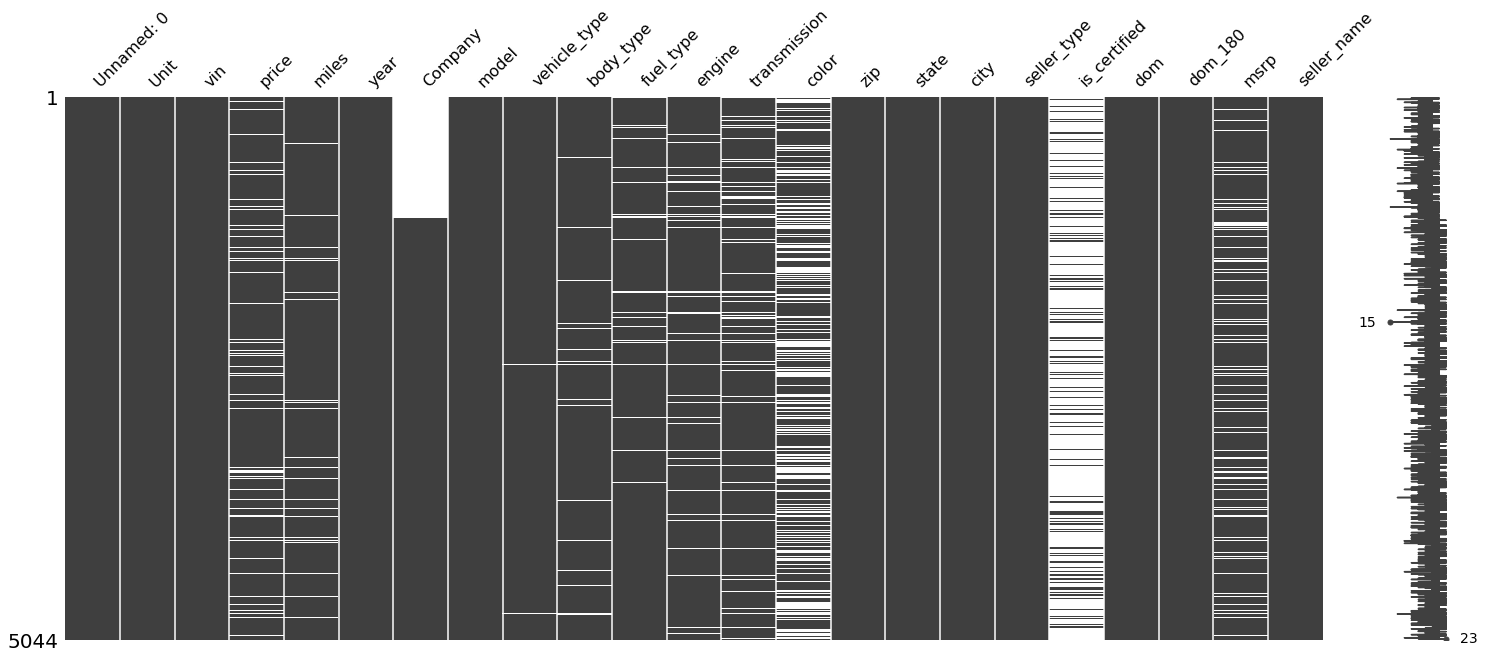

In [12]:
import missingno as msno
msno.matrix(df)

### Droping unnecessary Columns

In [13]:
df.drop(['Unnamed: 0','color','is_certified'], axis=1)

,Unit,vin,price,miles,year,Company,model,vehicle_type,body_type,fuel_type,engine,transmission,zip,state,city,seller_type,dom,dom_180,msrp,seller_name
0,1,19UDE2F3XGA002005,16997.0,25499.0,2016,NaN,ILX,Car,Sedan,Premium Unleaded,2.0L L4 16V DOHC,Automated Manual,28273,NC,Charlotte,dealer,60.0,60.0,16997.0,hendrick honda
1,1,19UUB1F35FA009543,21491.0,33352.0,2015,NaN,TLX,Car,Sedan,Premium Unleaded,2.5L L4 DOHC 16V,Automated Manual,28227,NC,Charlotte,dealer,90.0,3.0,21491.0,hendrick bmw
2,1,19UUB2F75FA000172,24499.0,22888.0,2015,NaN,TLX,Van,Sedan,Premium Unleaded,3.5L V6 SOHC 24V,Automatic,28269,NC,Charlotte,dealer,83.0,82.0,24499.0,audi northlake
3,1,1C4BJWDG7HL502000,33635.0,17956.0,2017,NaN,Wrangler,SUV,SUV,Regular Unleaded,3.6L V6 DOHC 24V FFV,Manual,28227,NC,Charlotte,dealer,154.0,27.0,33635.0,hendrick acura
4,1,1C4NJPCB5ED547385,13878.0,71061.0,2014,NaN,Patriot,SUV,SUV,Regular Unleaded,2.4L L4 DOHC 16V,Automatic,28273-6935,NC,Charlotte,dealer,110.0,49.0,13878.0,hendrickcars.com charlotte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,1,2T2ZK1BA5AC025623,15981.0,81711.0,2010,Lexus,RX 350,SUV,SUV,Premium Unleaded,3.5L V6 DOHC 24V,Automatic,28211,NC,Charlotte,dealer,91.0,2.0,15981.0,sonic automotive
5040,1,2T2ZK1BA5FC154517,25998.0,38000.0,2015,Lexus,RX 350,SUV,SUV,Regular Unleaded,3.5L V6 DOHC 24V,Automatic,28227,NC,Charlotte,dealer,2.0,2.0,NaN,carmax independence boulevard
5041,1,2T3DFREV2HW560036,27418.0,16517.0,2017,Toyota,RAV4,SUV,SUV,Regular Unleaded,2.5L L4 DOHC 16V,NaN,28273,NC,Charlotte,dealer,100.0,89.0,27418.0,south charlotte nissan
5042,1,3C4PDCBG7FT678464,14549.0,55392.0,2015,Dodge,Journey,SUV,SUV,Regular Unleaded,3.6L V6 DOHC 24V,Automatic,28212,NC,Charlotte,dealer,20.0,12.0,NaN,hendrick motors of charlotte


In [28]:
# Number of each type of column
df.dtypes.value_counts()

object     14
float64     6
int64       3
dtype: int64

In [14]:
df.describe()    # Quantitative

,Unnamed: 0,Unit,price,miles,year,is_certified,dom,dom_180,msrp
count,5044.000000,5044.0,4621.000000,4843.000000,5044.000000,882.0,5043.000000,5043.000000,4326.000000
mean,2522.500000,1.0,24552.804371,52054.276069,2013.684774,1.0,69.974618,47.131866,22858.524734
std,1456.221709,0.0,44296.655094,43558.835403,3.621295,0.0,107.313390,84.007129,13646.153736
min,1.000000,1.0,1100.000000,2.000000,1990.000000,1.0,1.000000,0.000000,2000.000000
25%,1261.750000,1.0,13981.000000,23007.000000,2012.000000,1.0,16.000000,10.000000,13993.250000
50%,2522.500000,1.0,19522.000000,39676.000000,2015.000000,1.0,39.000000,26.000000,19993.000000
75%,3783.250000,1.0,28777.000000,71307.500000,2016.000000,1.0,84.000000,53.000000,28992.750000
max,5044.000000,1.0,999584.000000,835187.000000,2019.000000,1.0,1758.000000,1758.000000,336122.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [15]:
df.describe(include='object')    # Qualitative

,vin,Company,model,vehicle_type,body_type,fuel_type,engine,transmission,color,zip,state,city,seller_type,seller_name
count,5044,3910,5041,5036,4890,4837,4692,4560,3099,5044,5044,5044,5044,5044
unique,5044,43,462,6,9,7,272,7,586,21,2,1,1,102
top,19UDE2F3XGA002005,Chevrolet,3 Series,Car,SUV,Regular Unleaded,2.4L L4 DOHC 16V,Automatic,Black,28211,NC,Charlotte,dealer,sonic automotive
freq,1,419,150,2462,1835,2805,459,3843,416,1645,5015,5044,5044,1645


#### Number of unique classes in each object column

In [29]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

vin             5044
Company           43
model            462
vehicle_type       6
body_type          9
fuel_type          7
engine           272
transmission       7
color            586
zip               21
state              2
city               1
seller_type        1
seller_name      102
dtype: int64

In [ ]:
 Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


In [ ]:
from sklearn.preprocessing import LabelEncoder
#vehicle_type, body_type, fuel_type, transmission, 
le = LabelEncoder()
df[['vehicle_type', 'body_type', 'fuel_type', 'transmission',]].apply(le.fit_transform)

In [18]:
from sklearn.preprocessing import LabelEncoder
#vehicle_type, body_type, fuel_type, transmission, 
le = LabelEncoder()
df[['vehicle_type', 'body_type', 'fuel_type', 'transmission',]].apply(le.fit_transform)

,vehicle_type,body_type,fuel_type,transmission
0,0,6,5,0
1,0,6,5,0
2,5,6,5,2
3,3,5,6,5
4,3,5,6,2
...,...,...,...,...
5039,3,5,5,2
5040,3,5,6,2
5041,3,5,6,7
5042,3,5,6,2


,Unnamed: 0,Unit,vin,price,miles,year,Company,model,vehicle_type,body_type,...,color,zip,state,city,seller_type,is_certified,dom,dom_180,msrp,seller_name
0,1,1,19UDE2F3XGA002005,16997.0,25499.0,2016,NaN,ILX,Car,Sedan,...,NaN,28273,NC,Charlotte,dealer,NaN,60.0,60.0,16997.0,hendrick honda
1,2,1,19UUB1F35FA009543,21491.0,33352.0,2015,NaN,TLX,Car,Sedan,...,Graphite Luster Metallic,28227,NC,Charlotte,dealer,NaN,90.0,3.0,21491.0,hendrick bmw
2,3,1,19UUB2F75FA000172,24499.0,22888.0,2015,NaN,TLX,Van,Sedan,...,Graphite Luster Metallic,28269,NC,Charlotte,dealer,1.0,83.0,82.0,24499.0,audi northlake
3,4,1,1C4BJWDG7HL502000,33635.0,17956.0,2017,NaN,Wrangler,SUV,SUV,...,Firecracker Red,28227,NC,Charlotte,dealer,NaN,154.0,27.0,33635.0,hendrick acura
4,5,1,1C4NJPCB5ED547385,13878.0,71061.0,2014,NaN,Patriot,SUV,SUV,...,True Blue Pearlcoat,28273-6935,NC,Charlotte,dealer,NaN,110.0,49.0,13878.0,hendrickcars.com charlotte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5040,1,2T2ZK1BA5AC025623,15981.0,81711.0,2010,Lexus,RX 350,SUV,SUV,...,Gray,28211,NC,Charlotte,dealer,NaN,91.0,2.0,15981.0,sonic automotive
5040,5041,1,2T2ZK1BA5FC154517,25998.0,38000.0,2015,Lexus,RX 350,SUV,SUV,...,NaN,28227,NC,Charlotte,dealer,NaN,2.0,2.0,NaN,carmax independence boulevard
5041,5042,1,2T3DFREV2HW560036,27418.0,16517.0,2017,Toyota,RAV4,SUV,SUV,...,NaN,28273,NC,Charlotte,dealer,NaN,100.0,89.0,27418.0,south charlotte nissan
5042,5043,1,3C4PDCBG7FT678464,14549.0,55392.0,2015,Dodge,Journey,SUV,SUV,...,Billet Silver Metallic Clearcoat,28212,NC,Charlotte,dealer,NaN,20.0,12.0,NaN,hendrick motors of charlotte


In [ ]:
data_fea = data[['zip','year','body_type','model','miles','price']]

In [ ]:
data_fea.head()

In [ ]:
data_fea.shape

In [ ]:
data_fea.isnull().sum()

In [ ]:
data_fea.dropna(inplace=True)

In [ ]:
data_fea.shape

In [ ]:
data_fea.tail()

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data_fea.isnull())

In [ ]:
X = data_fea.loc[:,['year','body_type','model','miles']]
y = data_fea.price 

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['year','body_type','model']] = \
X.loc[:,['year','body_type','model']].apply(enc.fit_transform)

In [ ]:
X.head()

In [ ]:
print('Shape of X = ',X.shape)
print('Shape of y = ',y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

In [ ]:
print('Shape of X_train = ',X_train.shape)
print('Shape of y_train = ',y_train.shape)
print('Shape of X_test = ',X_test.shape)
print('Shape of y_test = ',y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc=StandardScaler()
sc.fit(X_train)

In [ ]:
sc.mean_

In [ ]:
sc.scale_

In [ ]:
X_train.describe()

In [ ]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [ ]:
X_train_sc

In [ ]:
X_train_sc = pd.DataFrame(X_train_sc,columns=['year','body_type','model','miles'])
X_test_sc = pd.DataFrame(X_test_sc,columns=['year','body_type','model','miles'])

In [ ]:
X_train_sc.head()

In [ ]:
X_train_sc.describe().round(2)

In [ ]:
mmc = MinMaxScaler()
mmc.fit(X_train)

In [ ]:
X_train_mmc=mmc.transform(X_train)
X_test_mmc=mmc.transform(X_test)

In [ ]:
X_train_mmc

In [ ]:
X_train_mmc = pd.DataFrame(X_train_mmc,columns=['year','body_type','model','miles'])
X_test_mmc = pd.DataFrame(X_test_mmc,columns=['year','body_type','model','miles'])

In [ ]:
X_train_mmc.describe().round(2)

In [ ]:
sns.pairplot(X_train)

In [ ]:
sns.pairplot(X_train_sc)

In [ ]:
sns.pairplot(X_train_mmc)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.predict(X_test)

In [ ]:
y_test

In [ ]:
lr.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import Ridge,Lasso

In [ ]:
rd=Ridge()
rd.fit(X_train,y_train)

rd.score(X_test,y_test)

In [ ]:
ls=Lasso()
ls.fit(X_train,y_train)

ls.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=80,max_depth=22)
model.fit(X_train,y_train)
model.score(X_test,y_test)
#y_predict = model.predict(X_test)

In [ ]:
y_pread=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:

mse=mean_squared_error(y_test,y_pread)

rmse=np.sqrt(mse)

print('MSE :',mse)
print('RMSE :',rmse)

In [ ]:
plt.scatter(x =data_fea.miles, y = data_fea.price)
plt.xlabel("miles")
plt.ylabel("price")
plt.title("Scatter Plot")
plt.show()

In [ ]:
plt.scatter(x =data_fea.model, y = data_fea.price)
plt.xlabel("miles")
plt.ylabel("price")
plt.title("Scatter Plot")
plt.show()

In [ ]:
plt.scatter(x =data_fea.year, y = data_fea.price)
plt.xlabel("miles")
plt.ylabel("price")
plt.title("Scatter Plot")
plt.show()